### From the original Data source:
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
    1. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

    2. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
    3. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#### We will lead with some EDA (Explortatory Data Analysis) checking:
- Columns datatypes
- Description for the Numberical and Categorical columns
- Missing values.
- The whole distribuion
- Duplicated Records
- Ourliers (Box-Plots)

- These columns need to be decoded (**OperatingSystems**, **Browser**, **Region**, **TrafficType**) 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Everything seems fine, We can come up with intial hyptheses about those columns:
1. Durational Columns means are ordered in a logical way as the ProductRelated_Duration is on top because this is what excites peaple the most, then would come the Administrative_Duration as people are forced to see those pages and finally Informational_Duration
2. We expect some Skewness in the distributions of some columns like (Administrative_Duration, Informational_Duration, ProductRelated_Duration, ProductRelated, PageValues) as their mean differs from their median.
3. We expect those (Administrative, Informational, BounceRates, ExitRates) to be normally distributed as their means, medians are close.

In [4]:
cols = ['Administrative', 'Administrative_Duration',\
        'Informational', 'Informational_Duration',\
        'ProductRelated', 'ProductRelated_Duration',\
        'BounceRates', 'ExitRates', 'PageValues']
numerical_data = df[cols]

numerical_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


- There are no missing values.

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- There are 125 rows that represent duplicates. we need to drop them.

In [6]:
print('the number of duplicated rows before dropping are : ', df.duplicated().sum())

duplicated_rows = df.duplicated(keep=False)
df.drop_duplicates(inplace=True)

print('the number of duplicated after dropping rows are : ', df.duplicated().sum())

the number of duplicated rows before dropping are :  125
the number of duplicated after dropping rows are :  0


- All the columns are right skewed.
- ExitRates and BounceRates have some outliers.

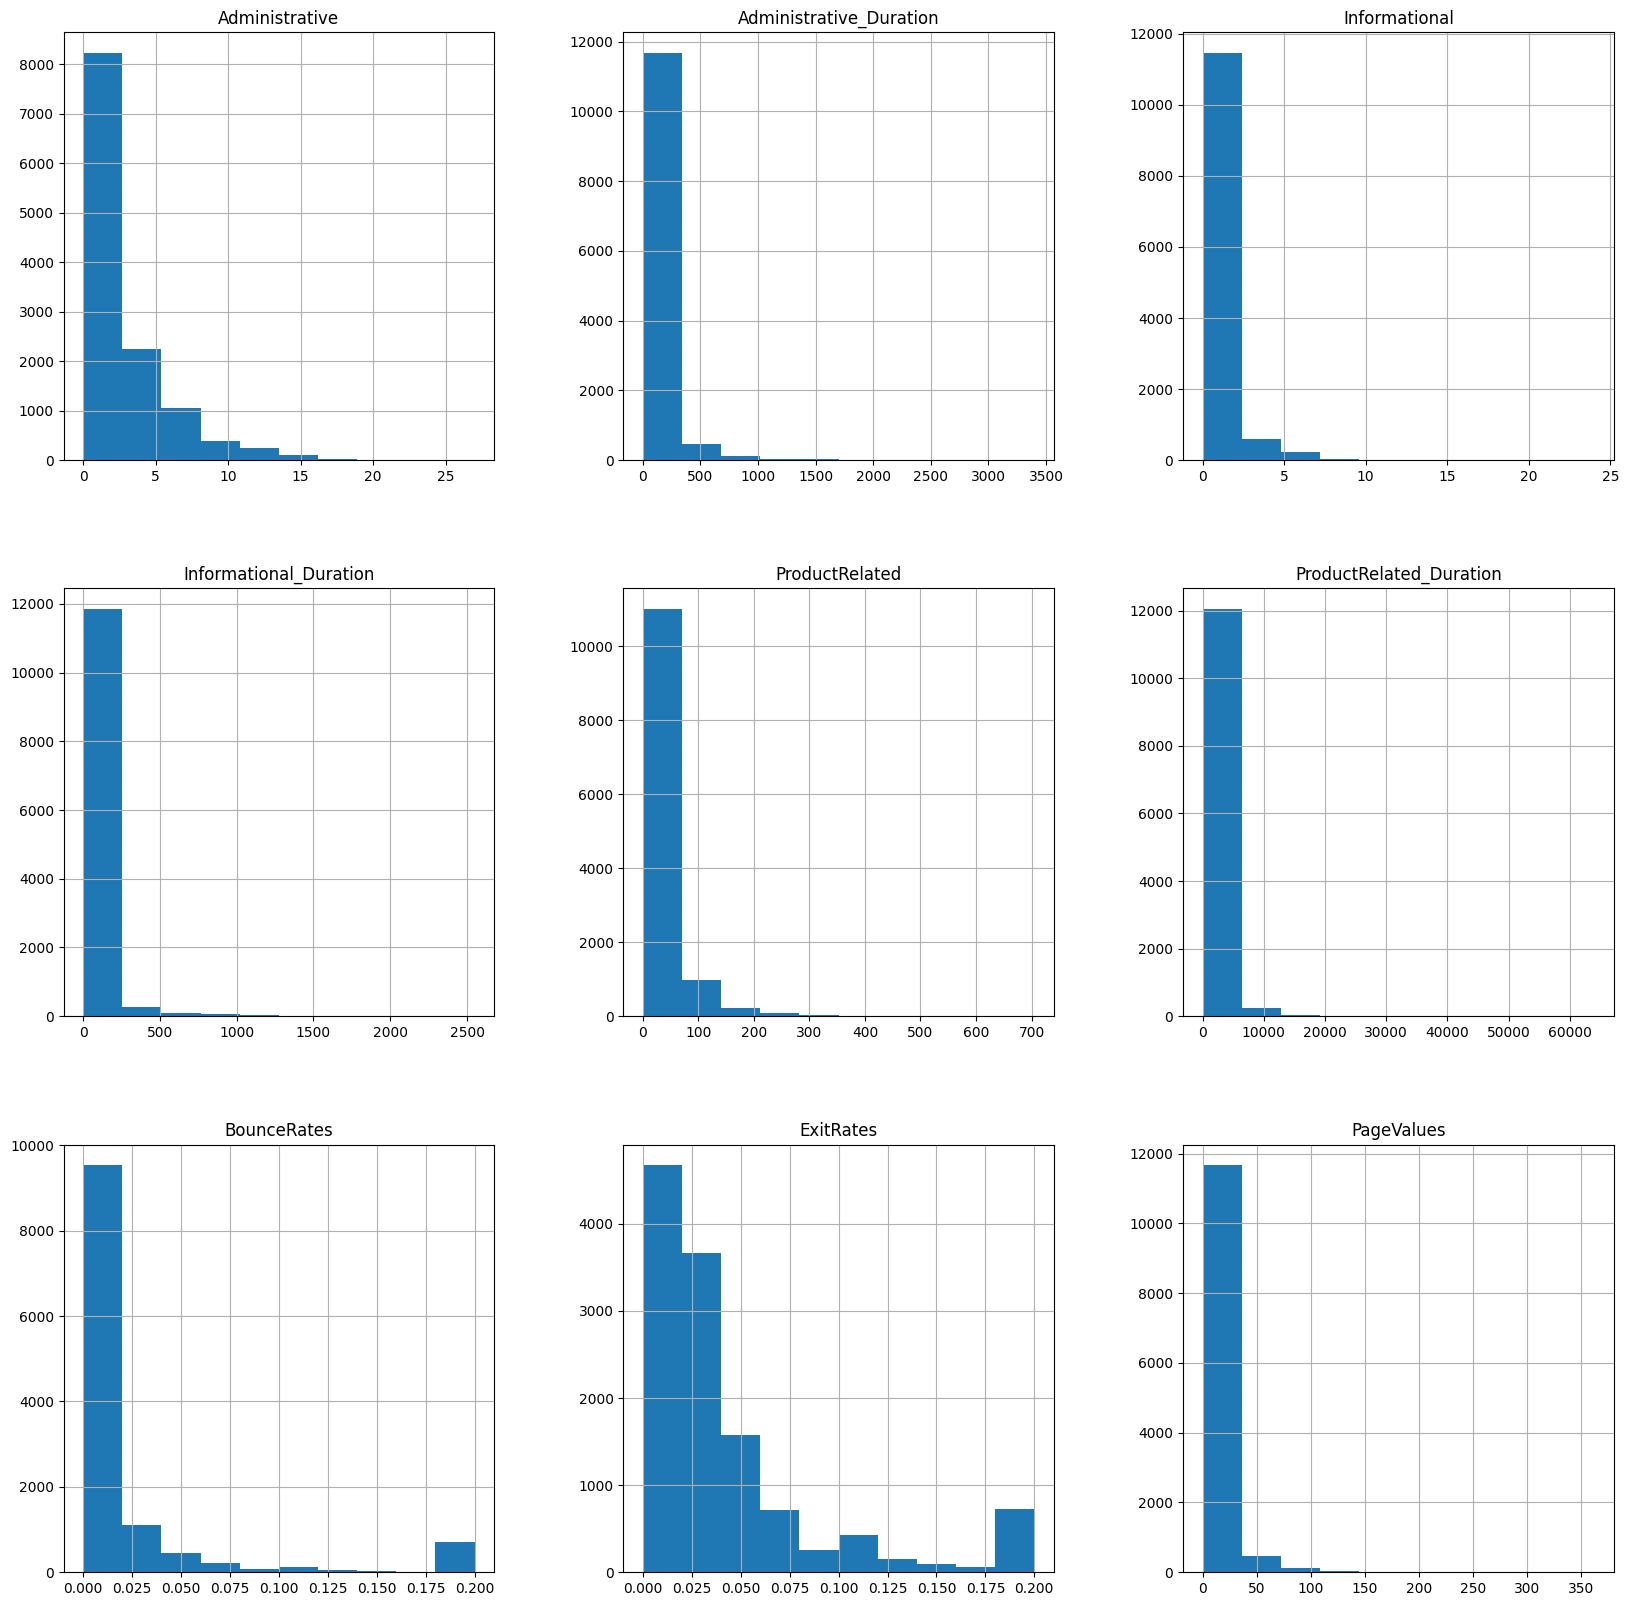

In [7]:
numerical_data.hist(figsize=(20, 20))
plt.savefig('figs/distributions of all columns.png', format='png')

- There are a lot of Outliers in all the columns.

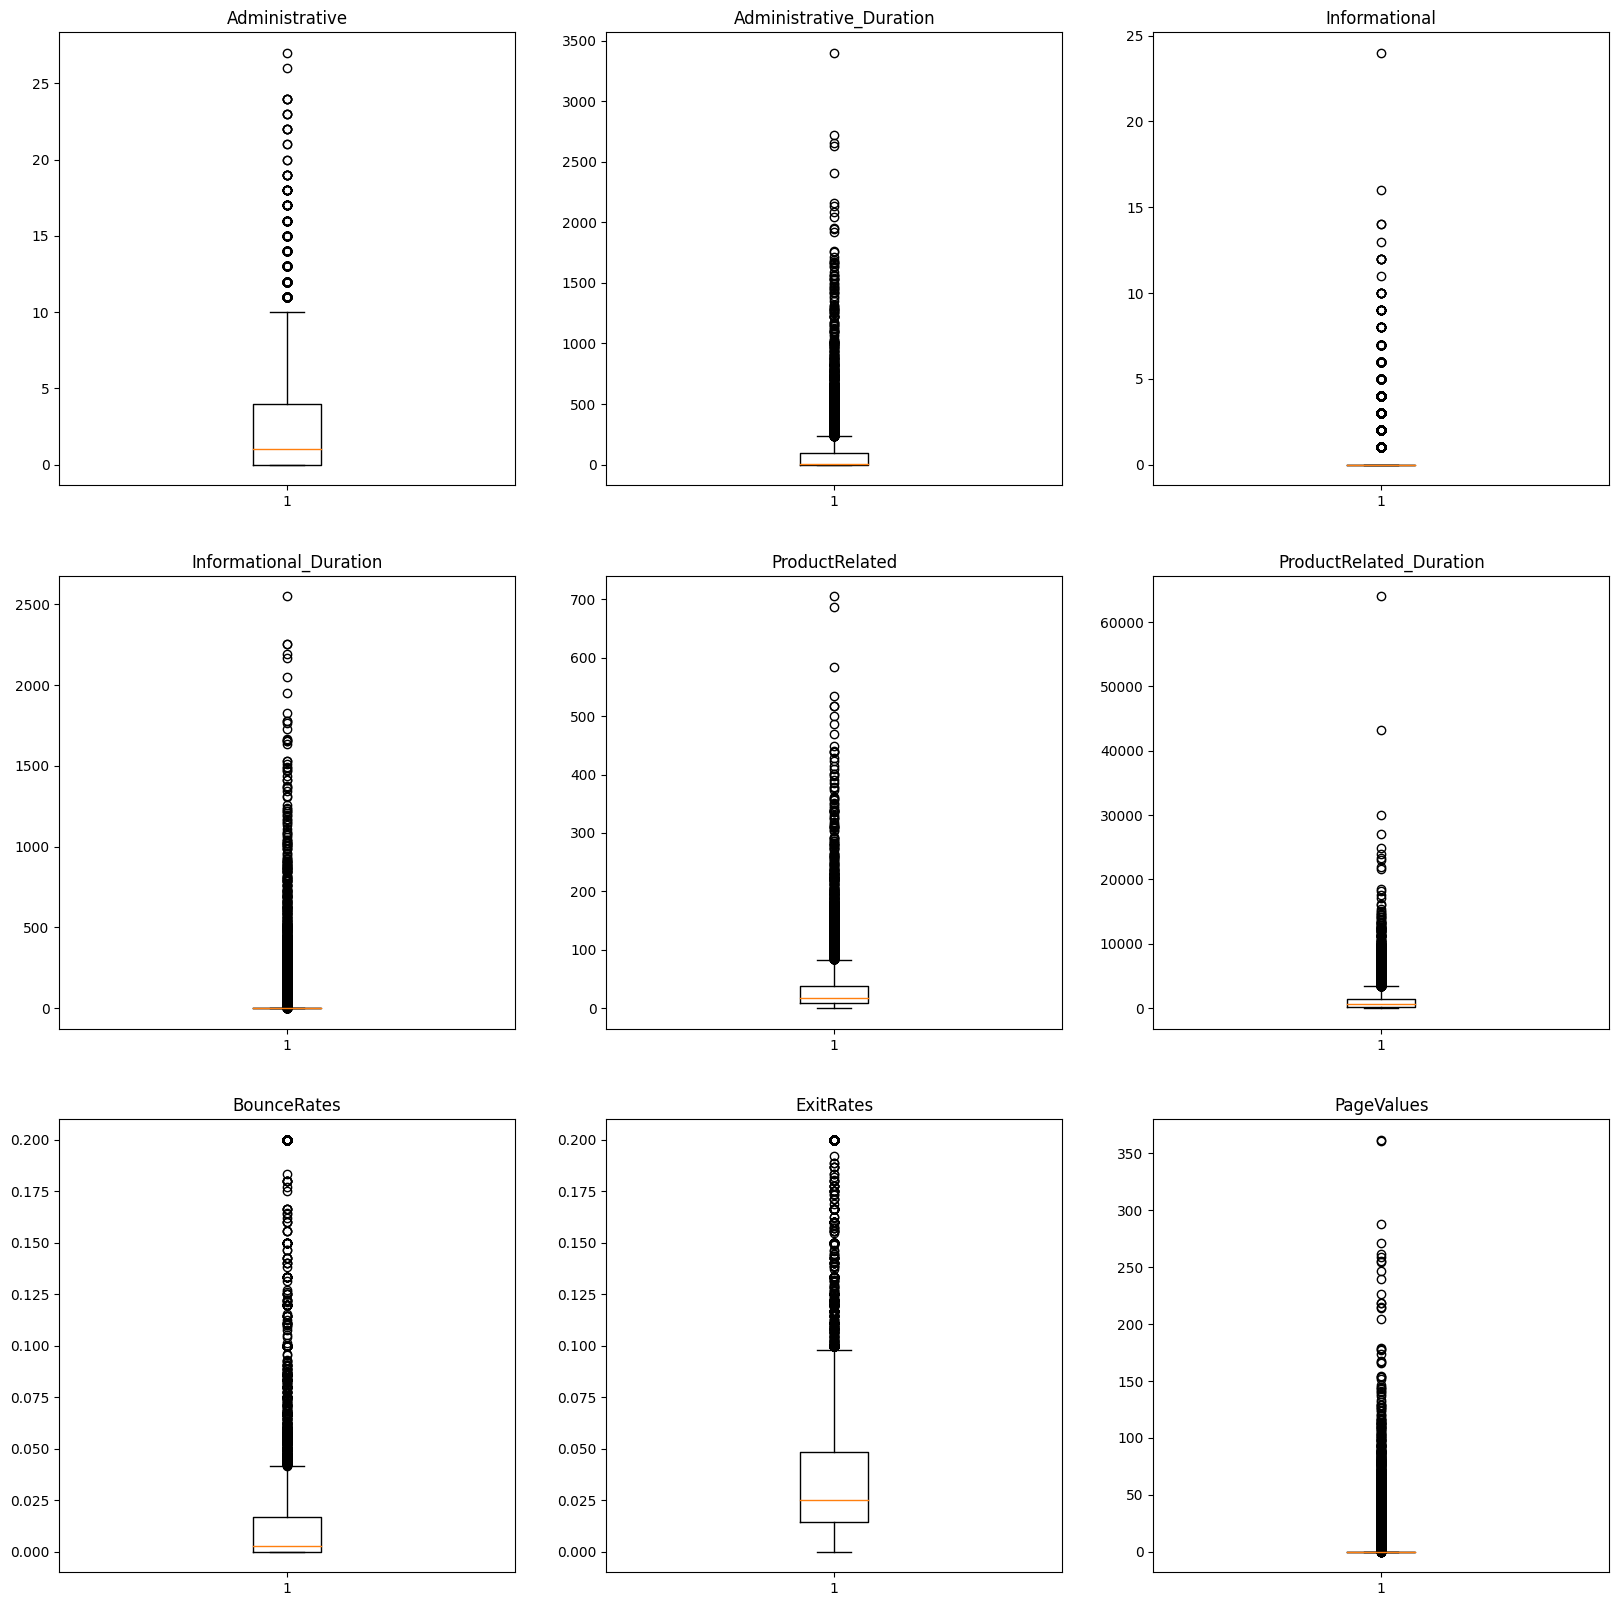

In [8]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

# Flatten the axs array to easily access each subplot
axs = axs.flatten()

# Create a boxplot for each column in the DataFrame
for i, column in enumerate(numerical_data.columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(column)

plt.savefig('figs/box-plot for all columns.png', format='png')
plt.show()

##### We can split exploratory data analytics into three parts:
- Univariate analysis
    - Univariate analysis is a statistical analysis technique that involves examining the characteristics of a single variable, typically by examining its distribution and summary statistics. The goal of univariate analysis is to gain an understanding of the variable's distribution, central tendency, dispersion, and any outliers or patterns.
- Bivariate analysis
    - Bivariate analysis, on the other hand, involves the analysis of two variables simultaneously to determine the relationship between them. Bivariate analysis can be used to identify correlations or associations between two variables, and it typically involves creating a scatter plot or other graphical representation to visualize the relationship between the two variables.
- Linear relationships

- Univariate columns:
    1. OperatingSystem
    2. Browser
    3. Region
    4. TrafficType
    5. Month
    6. VisitorType
    7. Weekend
    8. Revenue

In [3]:
def countplot_with_percentages(col, hue=None, percent=True, color='steelblue'):
    if percent:
        print(df[col].value_counts(normalize=True))

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, 
                x=col,
                hue=hue,
                color=color)
    if hue:
        plt.savefig(f'figs/{col} Counts with {hue} hue.png', format='png')
    
    plt.savefig(f'figs/{col} Counts.png', format='png')
    

- 2 operating system is the highes one being used in the sessions.

2    0.535928
1    0.208849
3    0.207292
4    0.039164
8    0.006145
6    0.001557
7    0.000574
5    0.000492
Name: OperatingSystems, dtype: float64


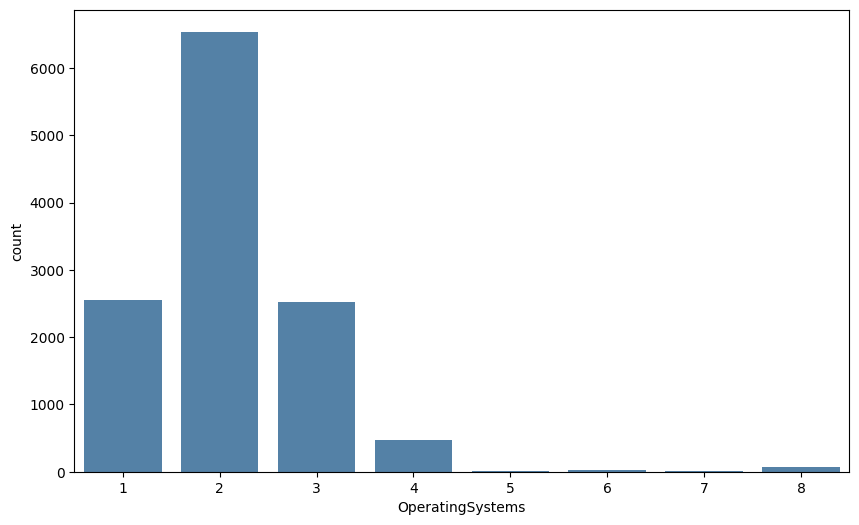

In [10]:
countplot_with_percentages('OperatingSystems')

- 2 browser is the highes one being used in the sessions.
- 84% of the data are 1, 2 browsers.

2     0.645883
1     0.198853
4     0.059893
5     0.038099
6     0.014256
10    0.013355
8     0.011061
3     0.008603
13    0.004588
7     0.004015
12    0.000819
11    0.000492
9     0.000082
Name: Browser, dtype: float64


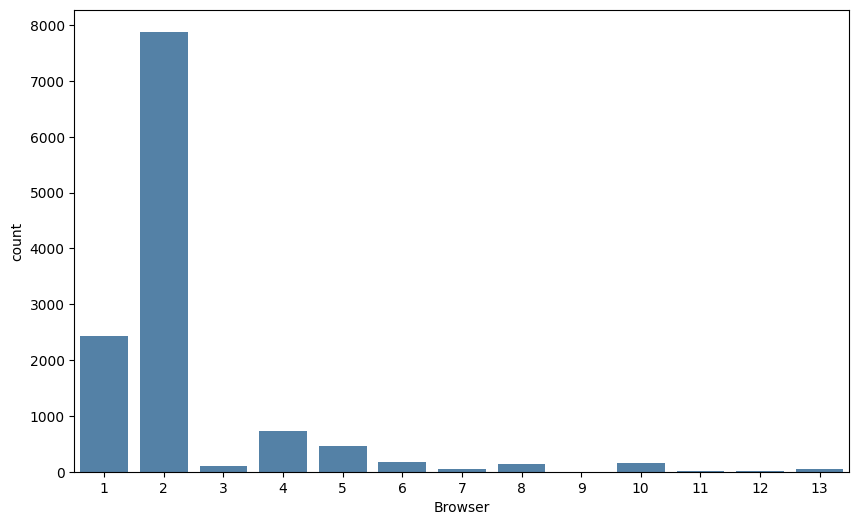

In [11]:
countplot_with_percentages('Browser')

- 1 Region is the highes one being used in the sessions.
- 1, 3 Regions represent more than 50% of our data.

1    0.386235
3    0.194920
4    0.095944
2    0.092421
6    0.065629
7    0.062106
9    0.041376
8    0.035313
5    0.026055
Name: Region, dtype: float64


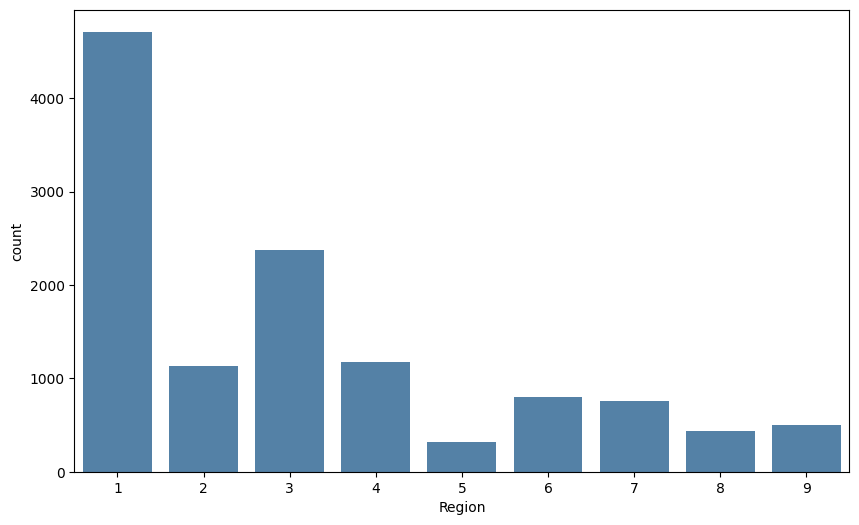

In [12]:
countplot_with_percentages('Region')

- 2 Traffic Type is the highes one being used in the sessions.
- 1, 3 and 4 are also high in usage.

2     0.320442
1     0.195658
3     0.164932
4     0.087341
13    0.059648
10    0.036870
6     0.036297
8     0.028103
5     0.021303
11    0.020238
20    0.015813
9     0.003359
7     0.003277
15    0.003032
19    0.001393
14    0.001065
18    0.000819
16    0.000246
12    0.000082
17    0.000082
Name: TrafficType, dtype: float64


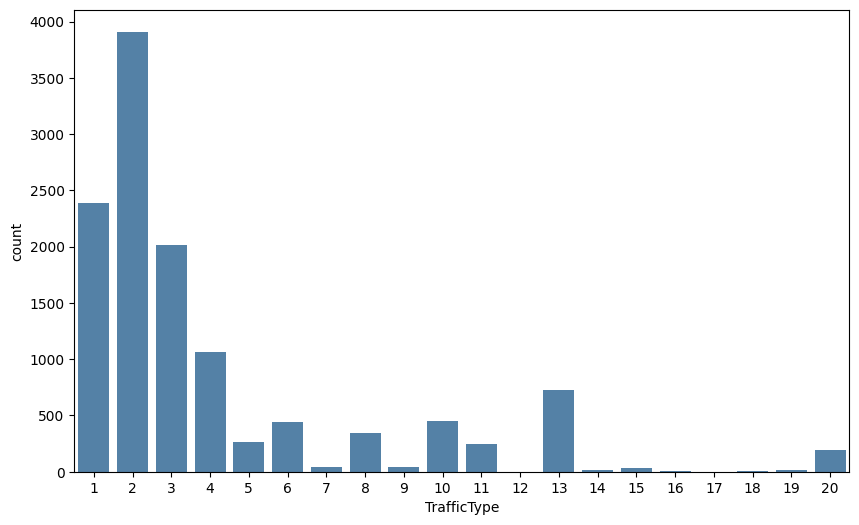

In [13]:
countplot_with_percentages('TrafficType')

- May, Nov, Mar and Dec respectively are the highes months being used in the sessions.

May     0.272757
Nov     0.244326
Mar     0.152397
Dec     0.139779
Oct     0.044982
Sep     0.036706
Aug     0.035477
Jul     0.035395
June    0.023351
Feb     0.014830
Name: Month, dtype: float64


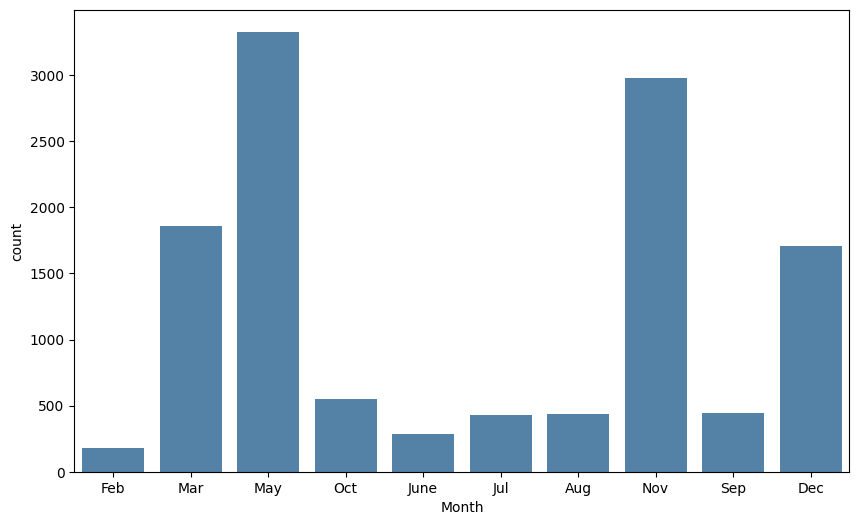

In [14]:
countplot_with_percentages('Month')

- Returning Visitor is the highes Visitor Type using our platform which is a good indication means that people tend to reuse our product.

Returning_Visitor    0.854650
New_Visitor          0.138714
Other                0.006637
Name: VisitorType, dtype: float64


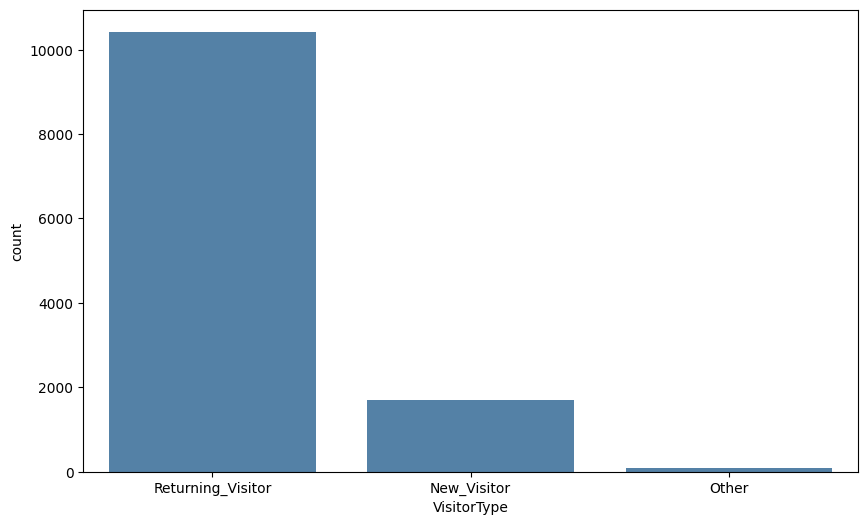

In [15]:
countplot_with_percentages('VisitorType')

- False Vales exists a lot more than True ones leading to people tend to use our website during weekdays more than weekends 

False    0.765752
True     0.234248
Name: Weekend, dtype: float64


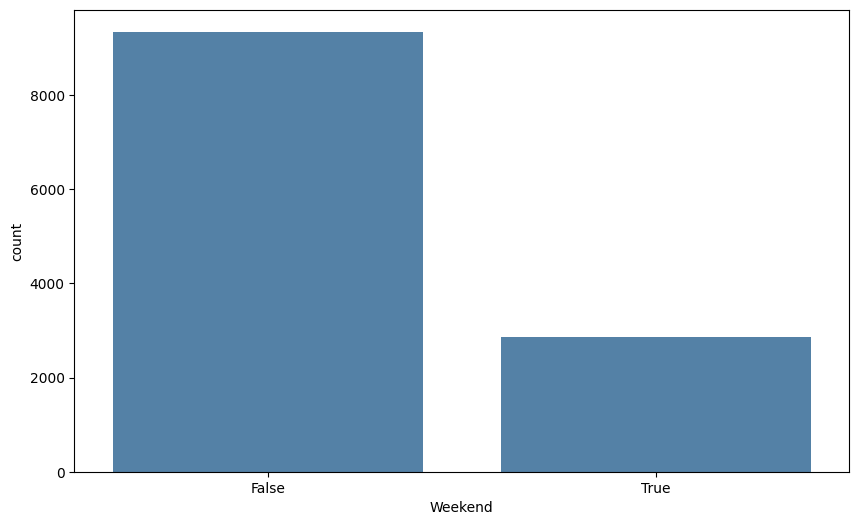

In [16]:
countplot_with_percentages('Weekend')

- False Values are much more than True ones which means that our data is imbalanced.

False    0.843671
True     0.156329
Name: Revenue, dtype: float64


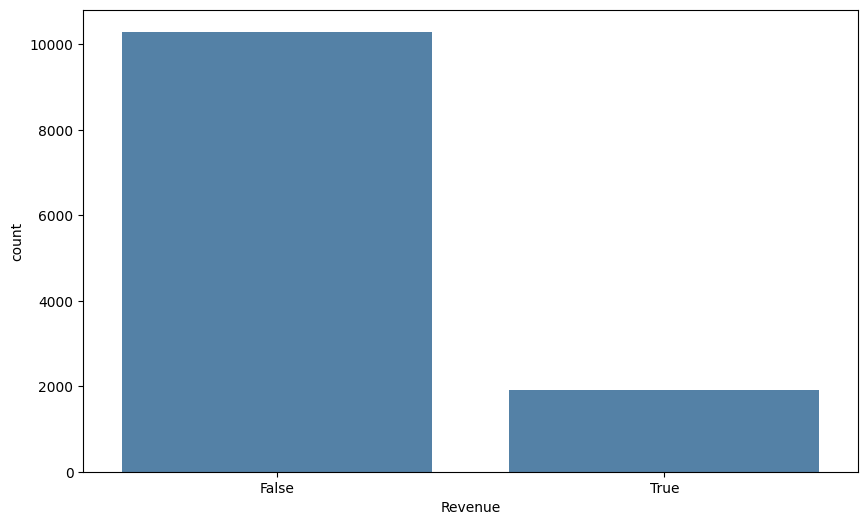

In [17]:
countplot_with_percentages('Revenue')

- 0.0 value is the top in among SpecialDay column and this indicated that SpecialDay doesn't impact the number of visitiors

0.0    0.897665
0.6    0.028677
0.8    0.026546
0.4    0.019910
0.2    0.014584
1.0    0.012618
Name: SpecialDay, dtype: float64


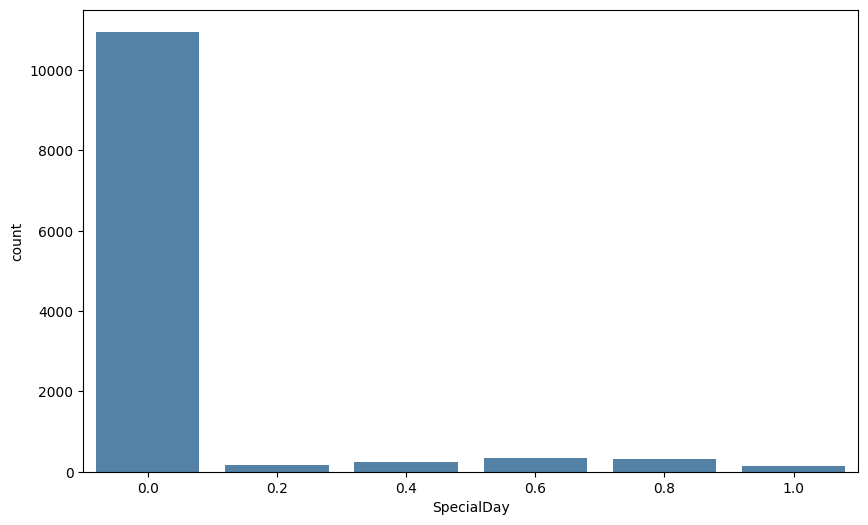

In [18]:
countplot_with_percentages('SpecialDay')

- 0 page is the highest page visited.

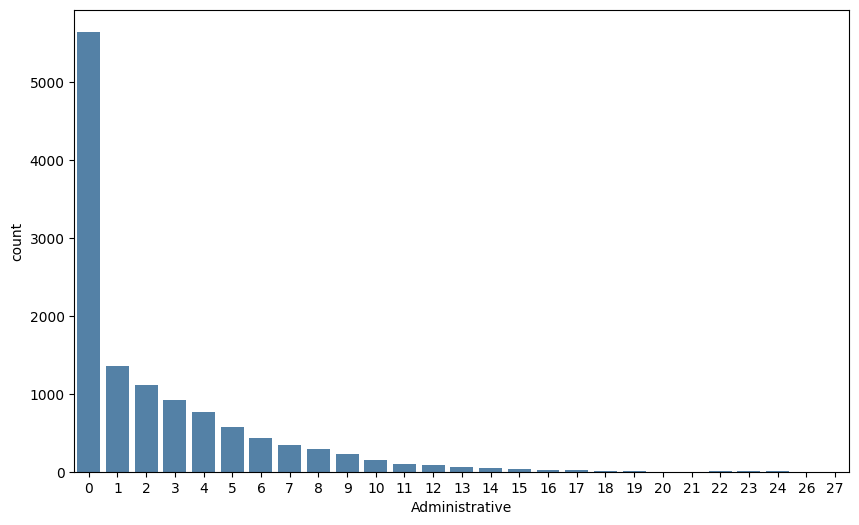

In [19]:
countplot_with_percentages('Administrative', percent=False)

- 0 page is the highest page visited.

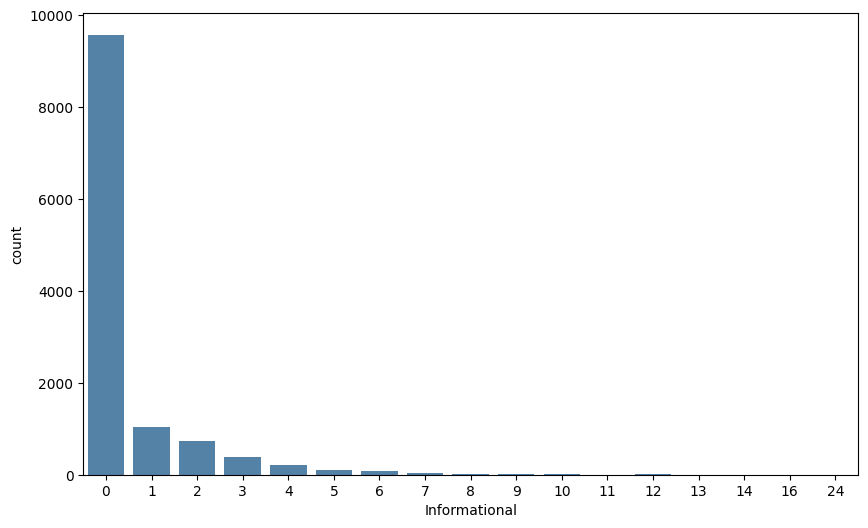

In [20]:
countplot_with_percentages('Informational', percent=False)

### Bivariate Columns: We will do every plot with respect to the revenue column.
1. Visitor type
2. Traffic type
3. Region
4. Browser type
5. Operating system
6. Month
7. Special day

- more revenue conversions happen for returning customers than new customers.

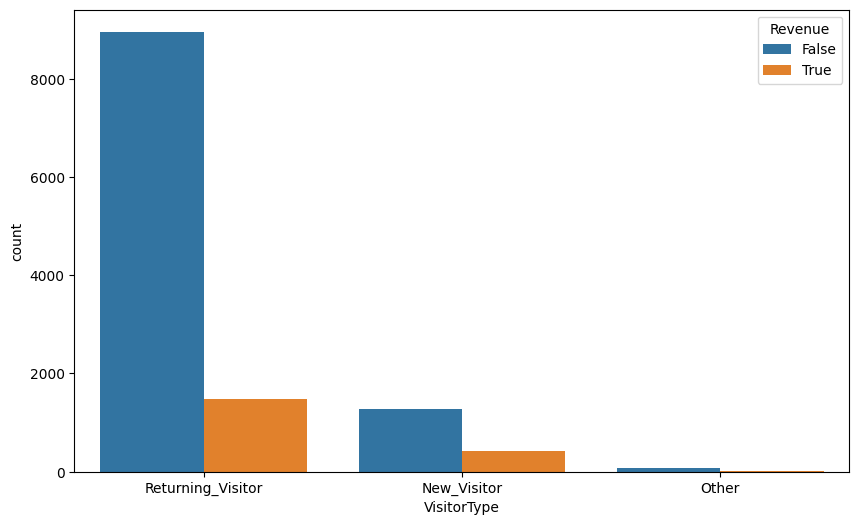

In [21]:
countplot_with_percentages('VisitorType', hue='Revenue', percent=False, color=None)

- we can see that more revenue conversion happens for web traffic generated from source 2. 
- web traffic generated from source 1, 3, 4 generated a considerable amount of web traffic.

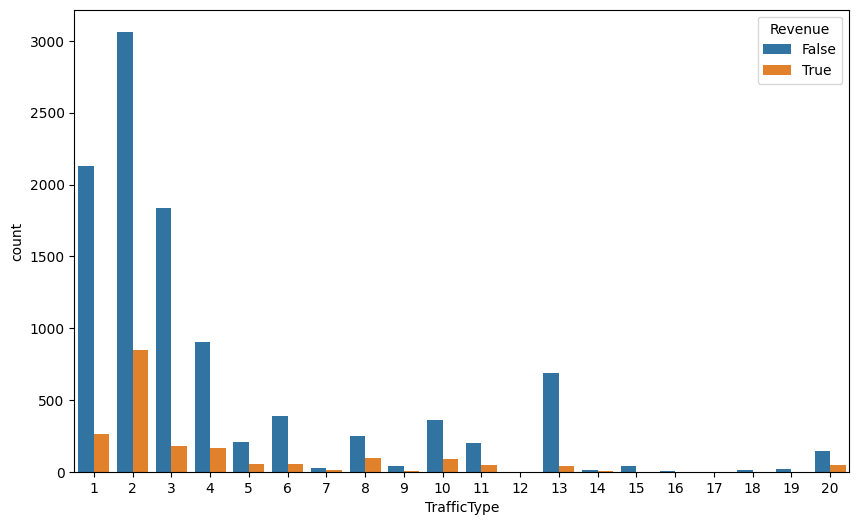

In [22]:
countplot_with_percentages('TrafficType', hue='Revenue', percent=False, color=None)

- we can see that region 1 accounts for most sales, and region 3 the second most.

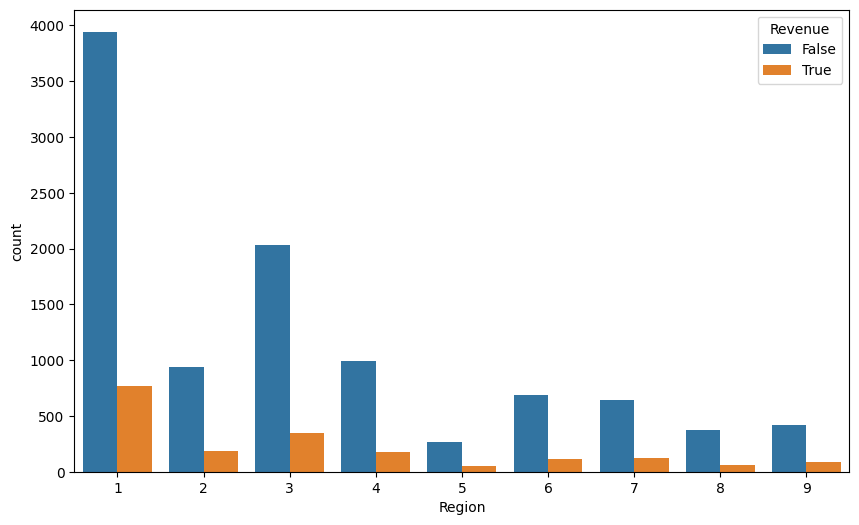

In [23]:
countplot_with_percentages('Region', hue='Revenue', percent=False, color=None)

- more revenue-generating transactions have been performed from Browser 2. Even though Browser 1 creates a considerable number of sessions.

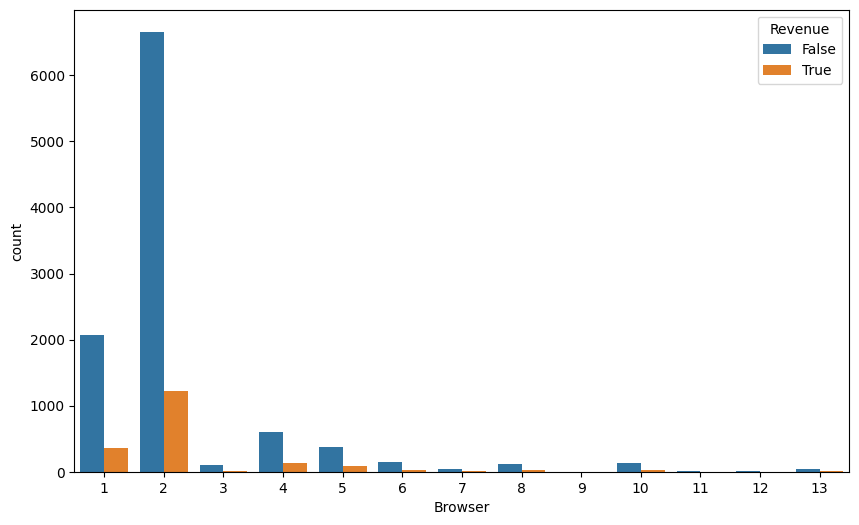

In [24]:
countplot_with_percentages('Browser', hue='Revenue', percent=False, color=None)

- more revenue-generating transactions happened with OS 2 than the other types.

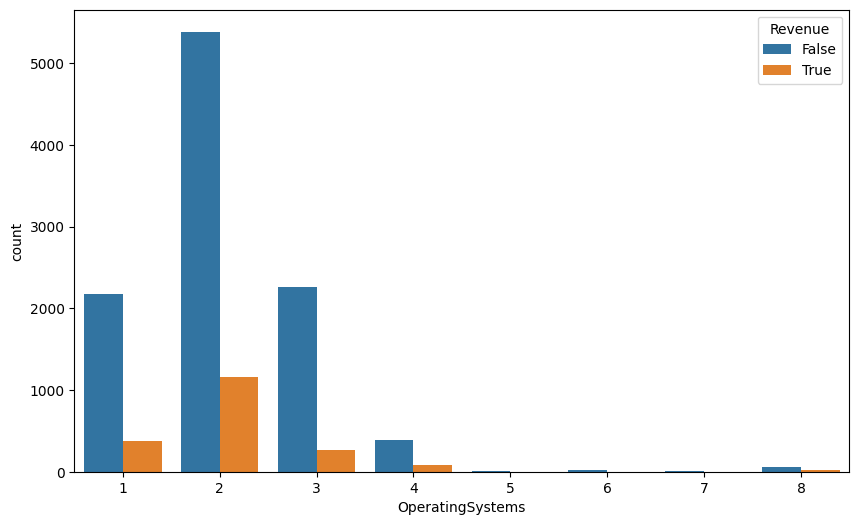

In [25]:
countplot_with_percentages('OperatingSystems', hue='Revenue', percent=False, color=None)

Website visitors may be high in May, but we can observe from the preceding bar plot that a greater number of purchases were made in the month of November. 

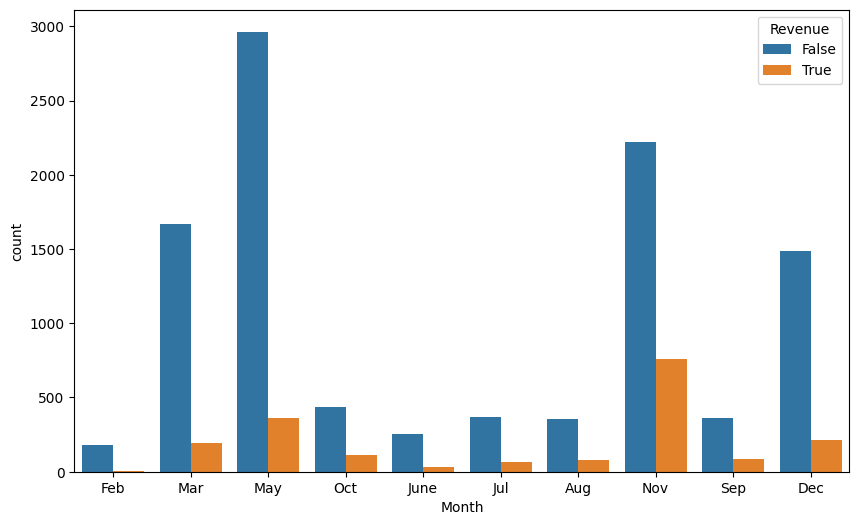

In [26]:
countplot_with_percentages('Month', hue='Revenue', percent=False, color=None)

- 0.0 value tend to have the most revenue generated.

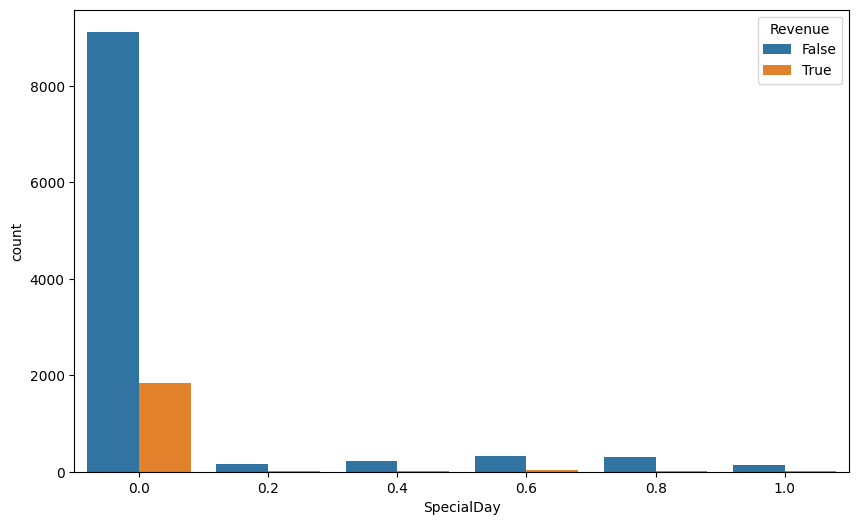

In [27]:
countplot_with_percentages('SpecialDay', hue='Revenue', percent=False, color=None)

- Most of the Revenue Generated come from Weekdays.

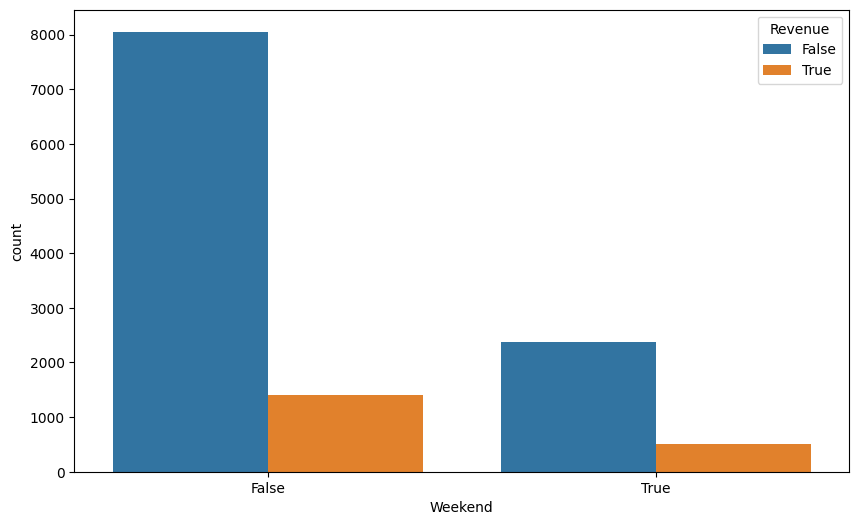

In [4]:
countplot_with_percentages('Weekend', hue='Revenue', percent=False, color=None)

### Linear Correlations:
1. Bounce Rate
2. Page Value
3. Exit Rate
4. Administrative & Administrative Duration
5. Informational & Informational Duration
6. Product Realted & Product Related Duration

## Linear Correlations:
- BounceRates has a weak negative correlation with PageValues, True-Revenues are correlated negatively than the False-Revenues.
- BounceRates has a strong positive correlation with the ExitRates.
- BounceRates has weak negative correlatoins with all pages sources and durations.
- **PageValues has a weak negative correlation on the False-Revenues and a weak positive correlation on the True-Revenues.**
- PageValues has a weak negative correlation with ExitRates.
- ExitRates has weak negative correlations with all page sources and durations.

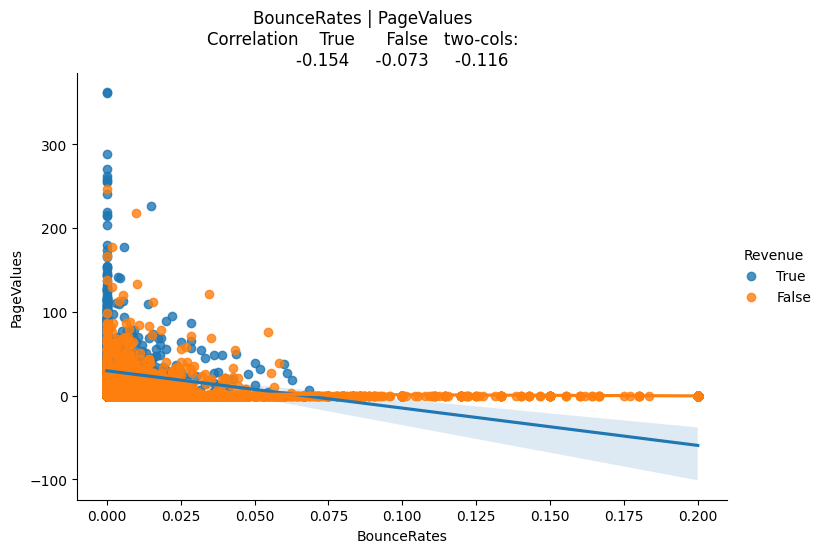

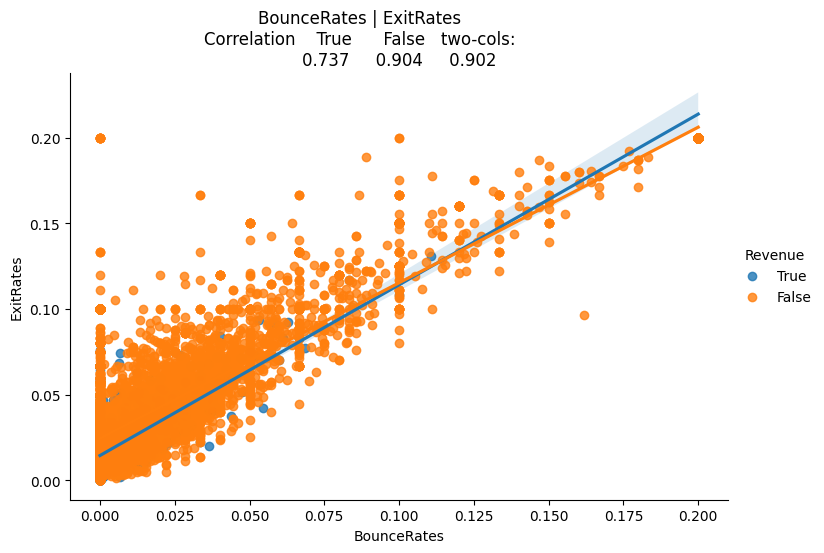

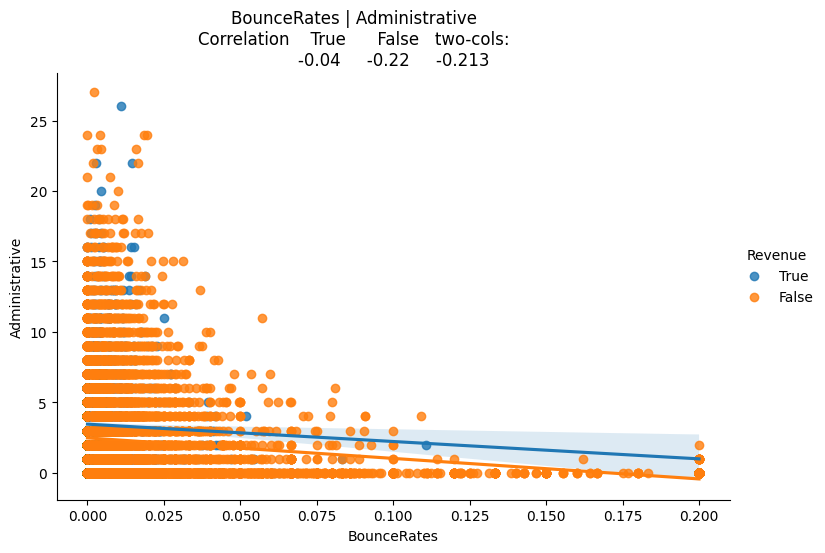

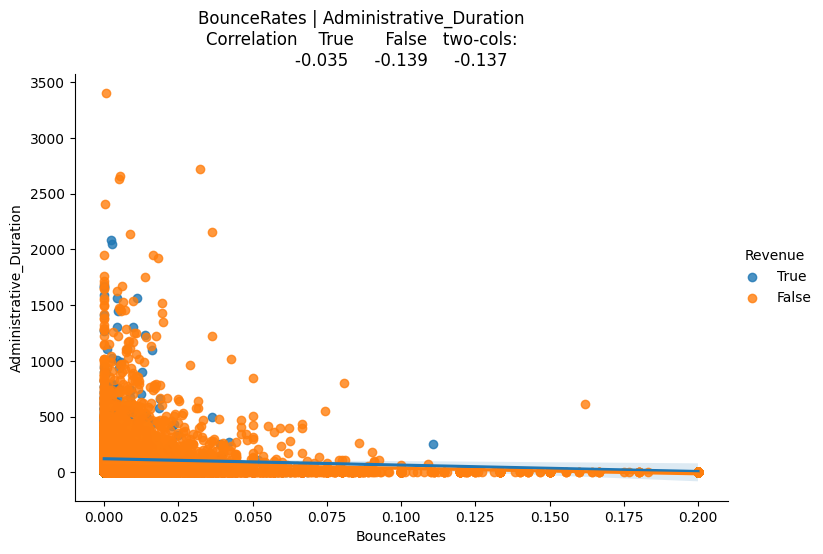

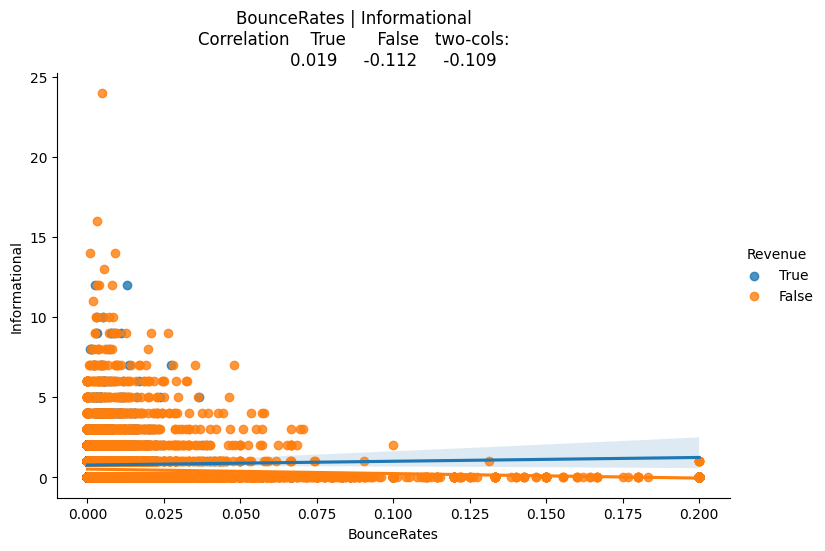

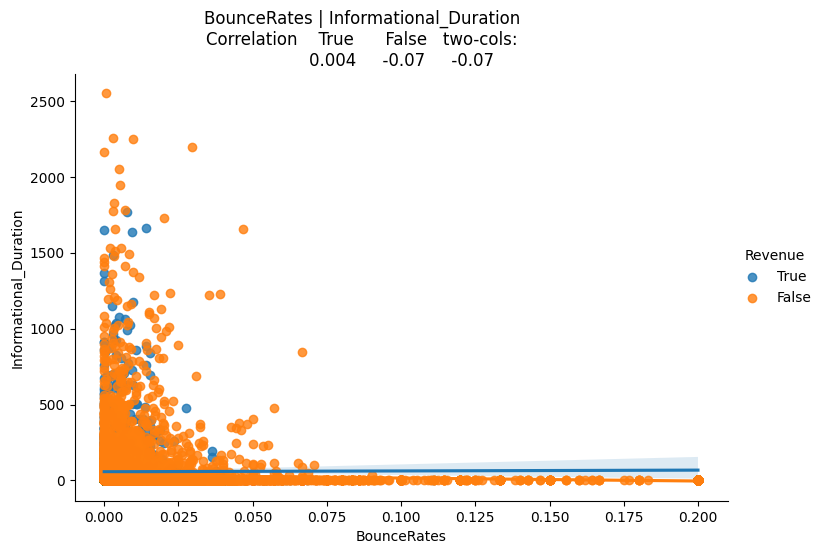

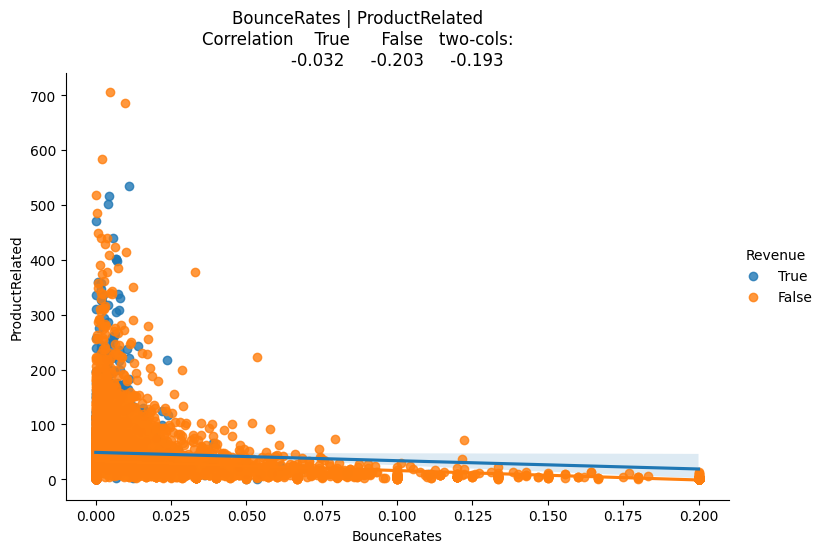

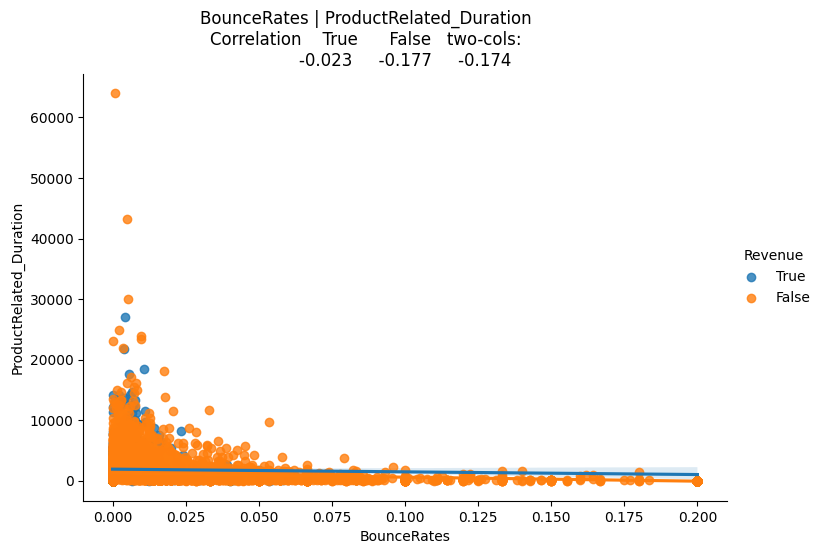

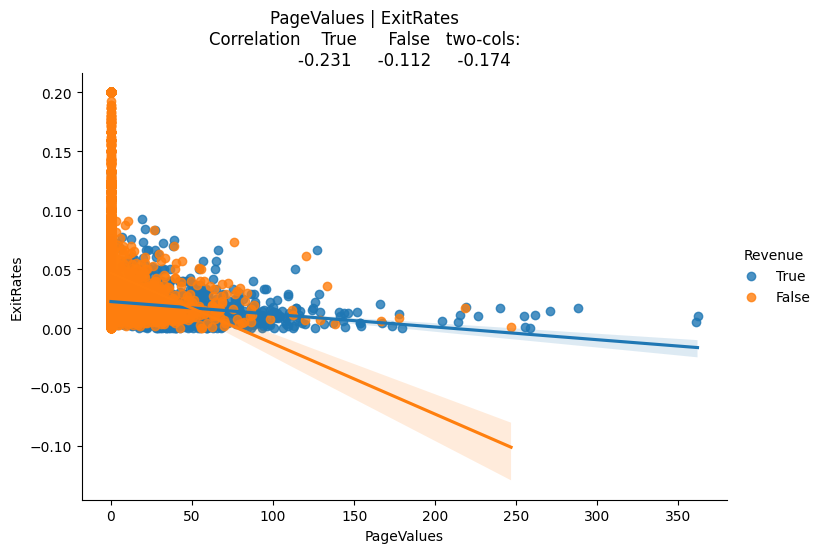

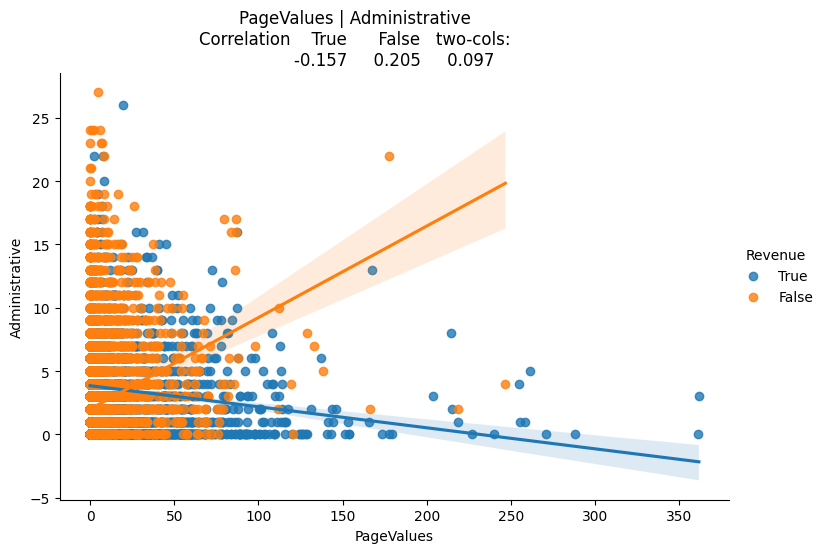

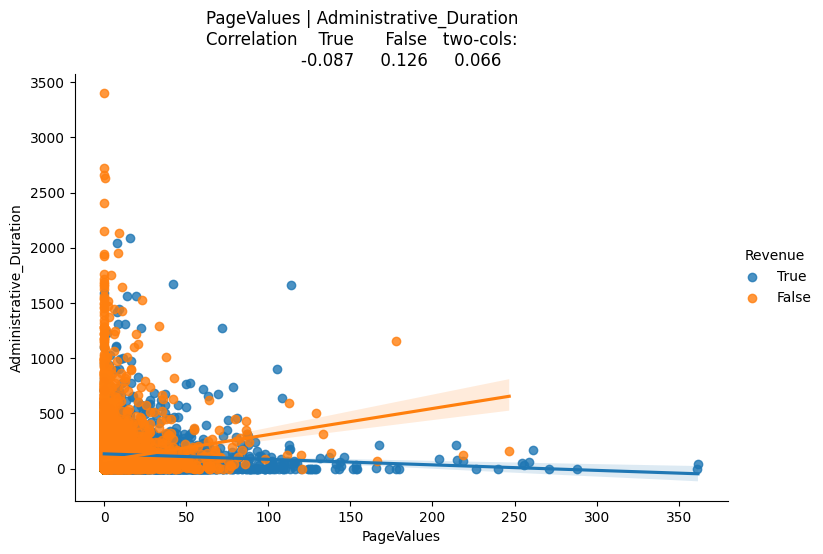

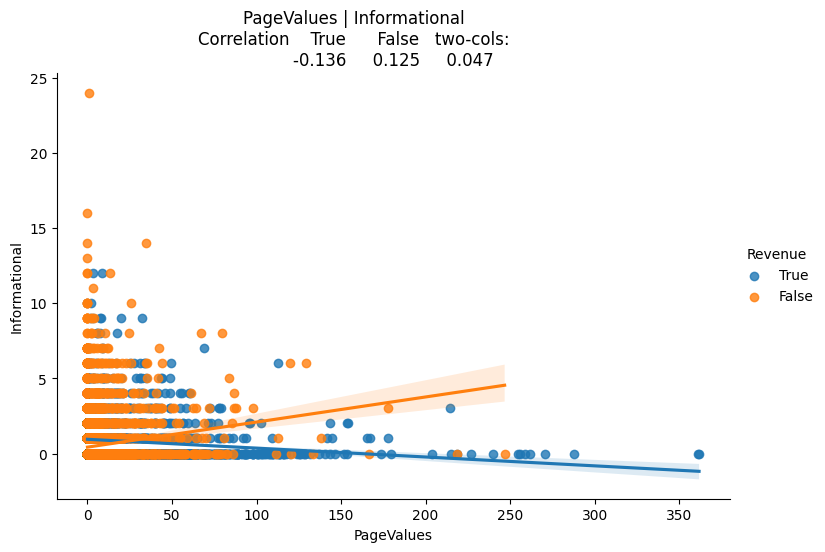

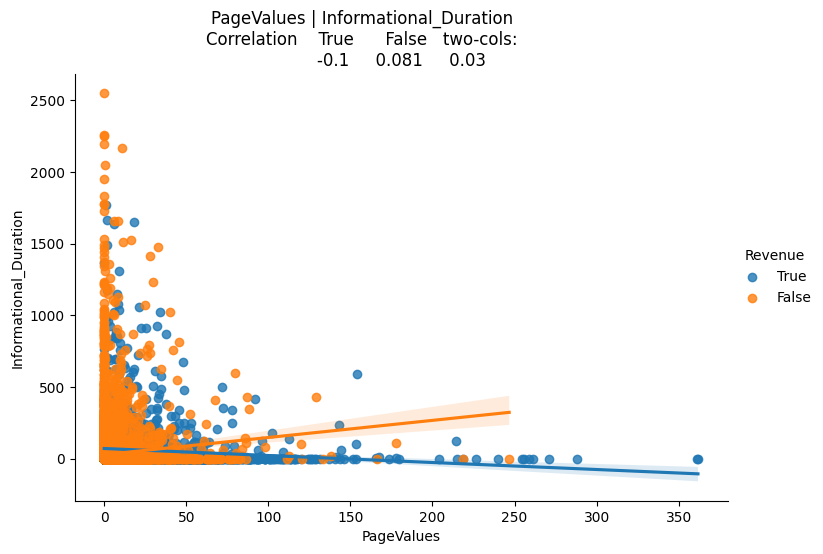

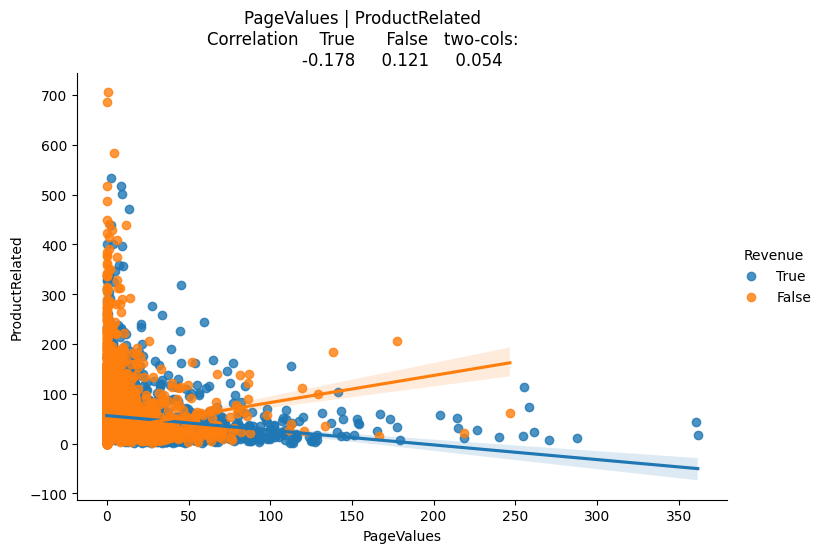

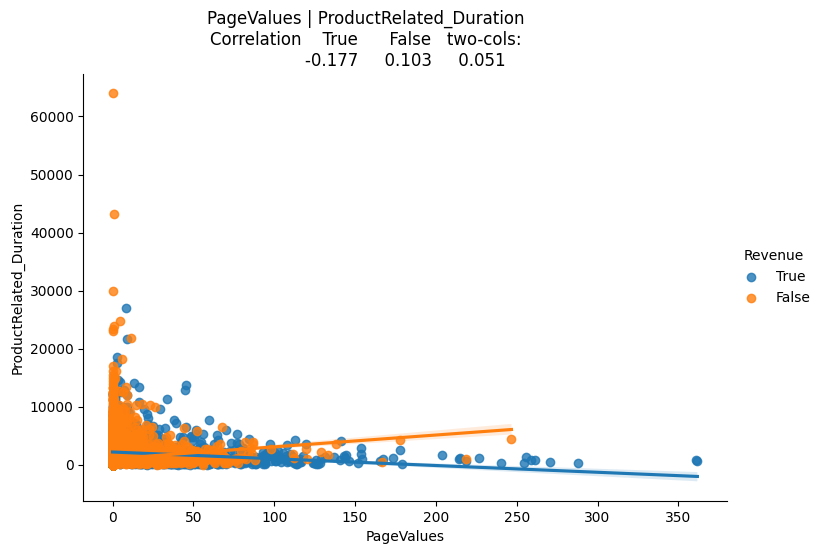

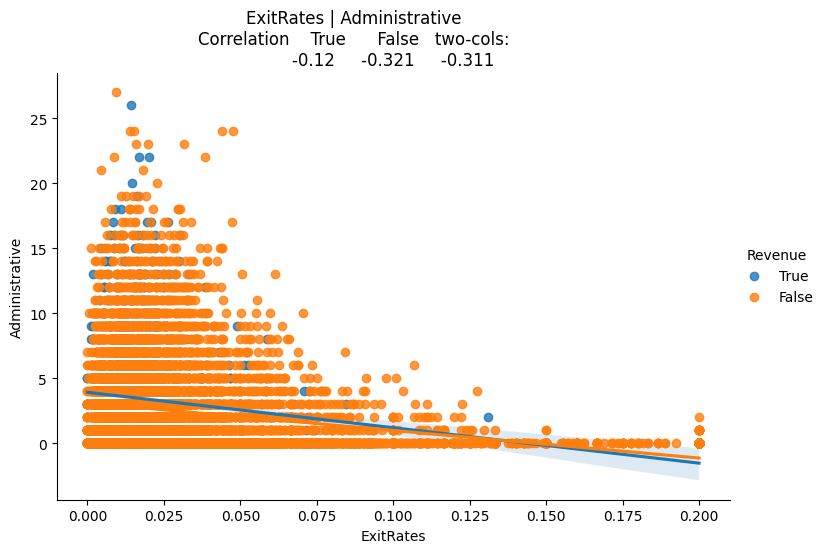

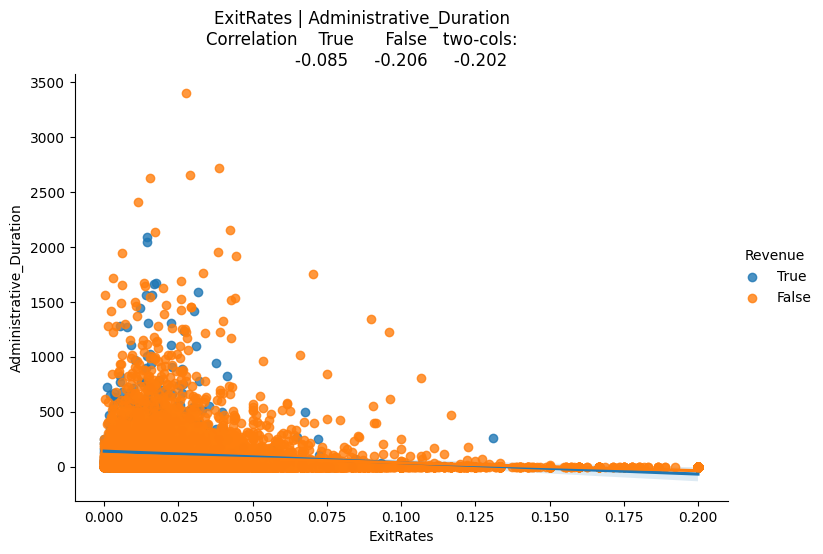

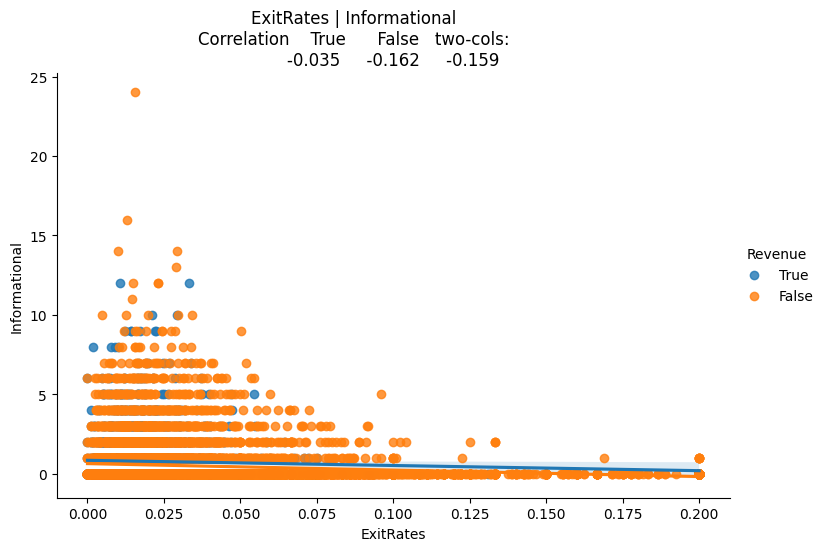

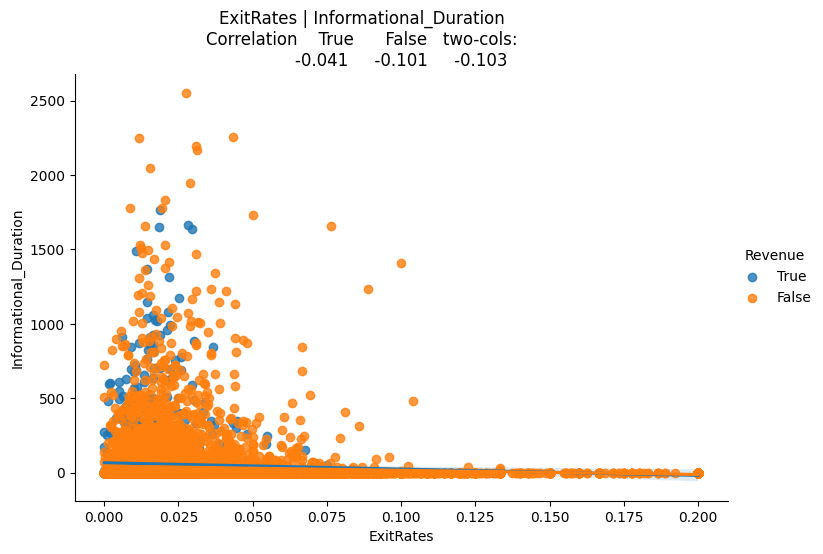

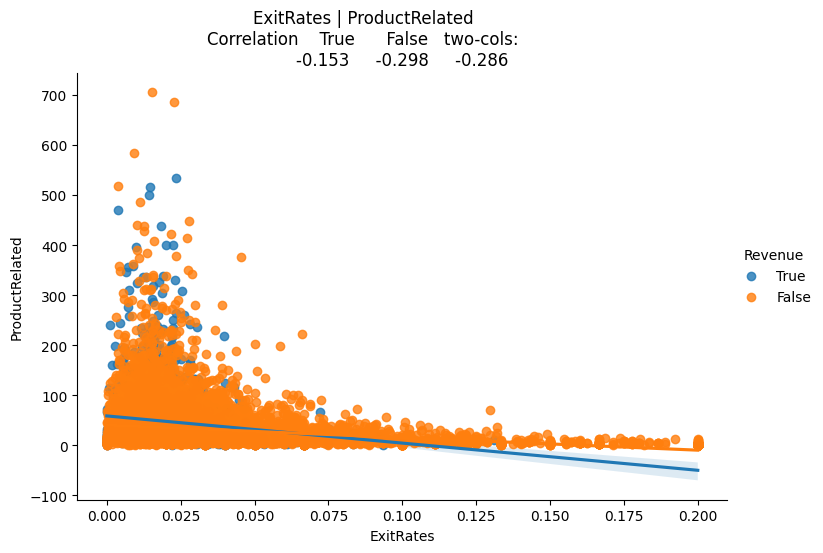

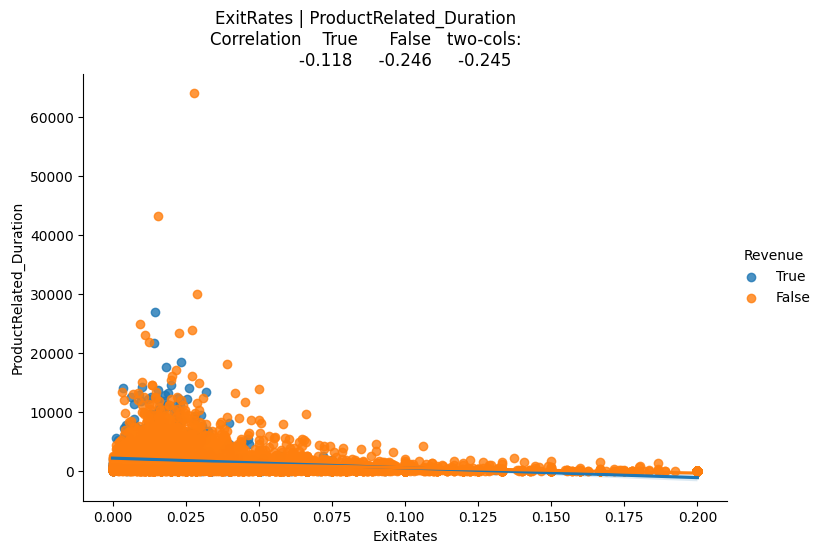

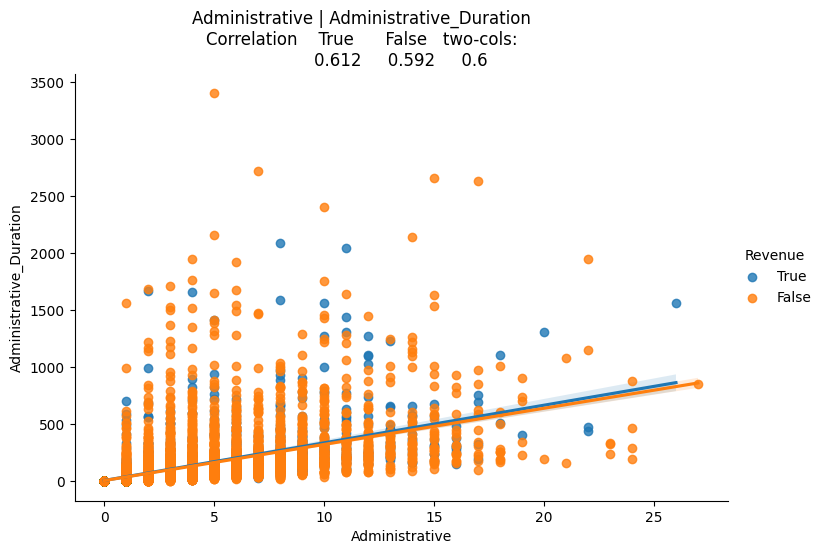

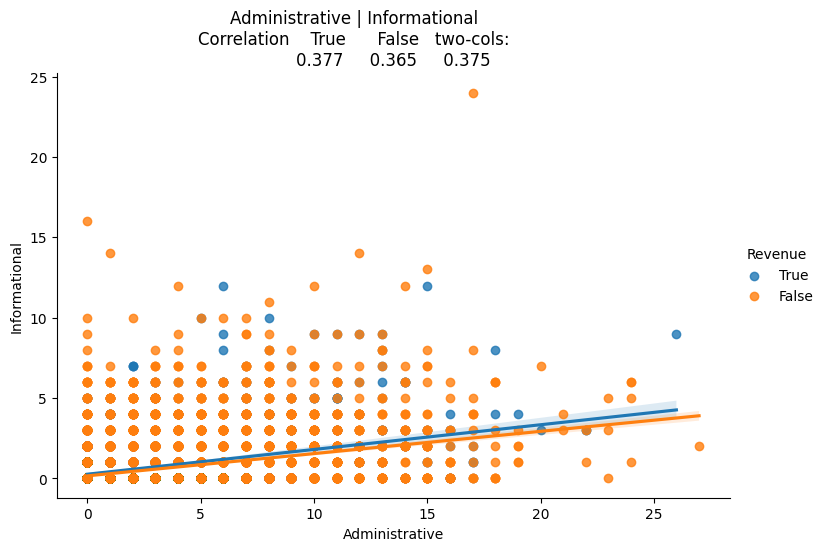

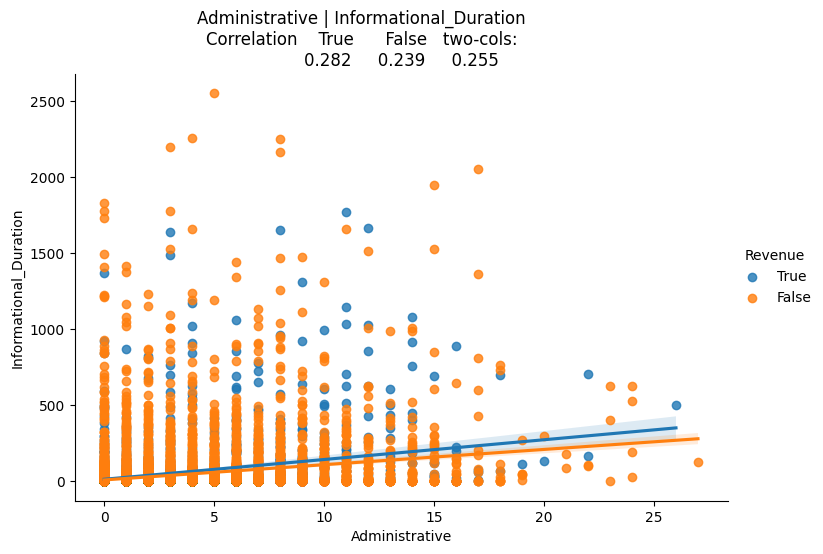

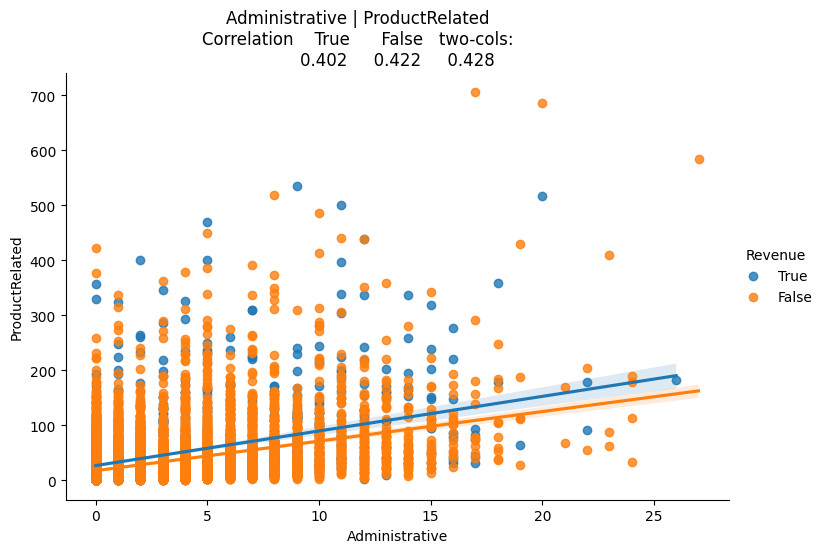

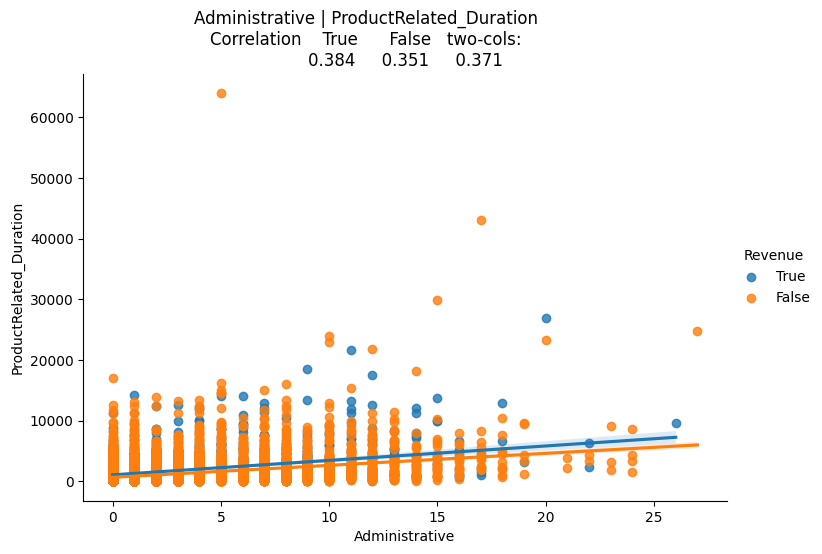

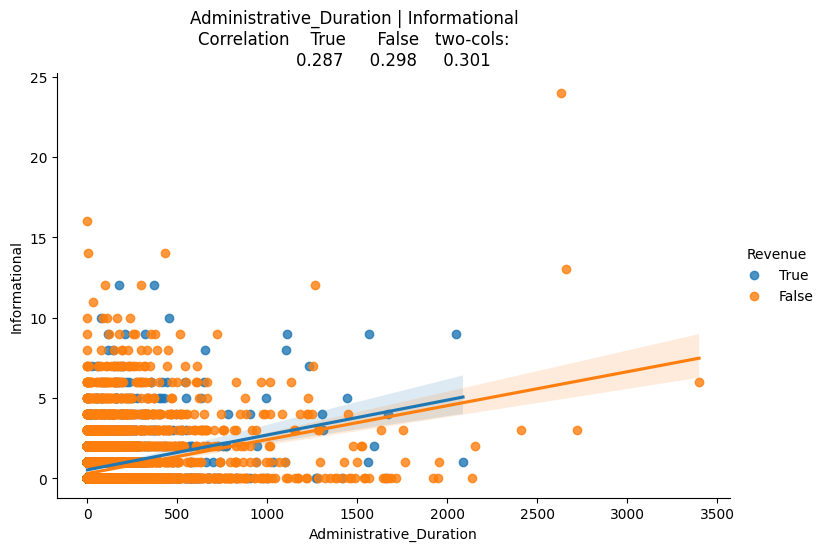

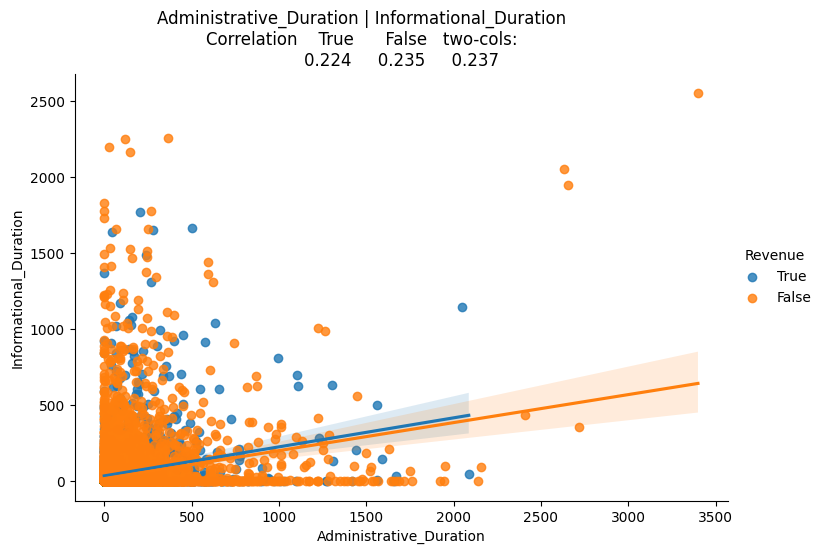

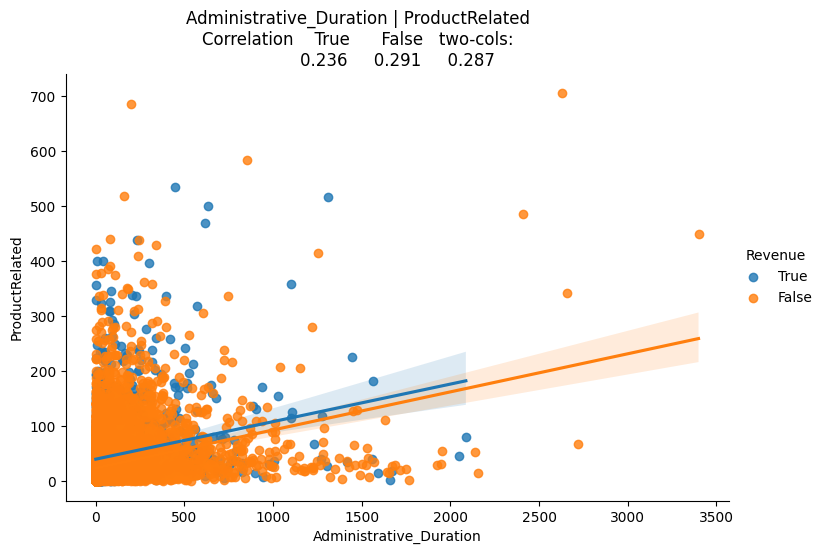

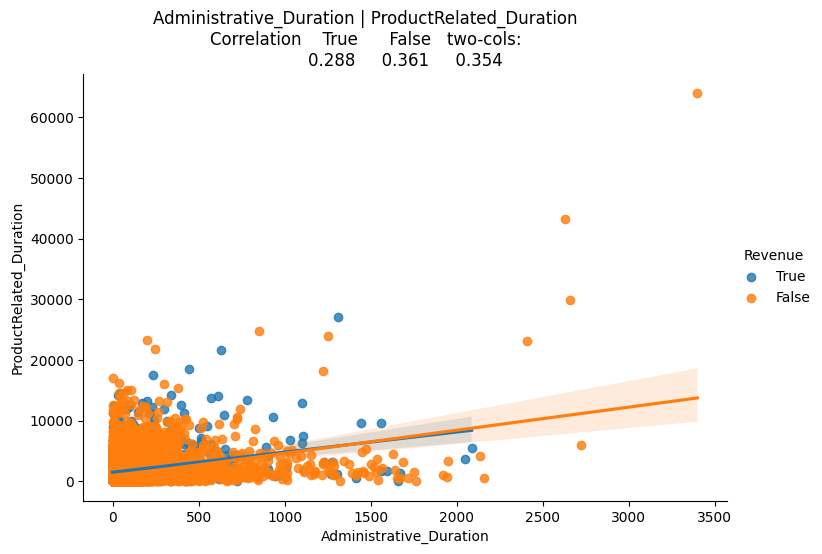

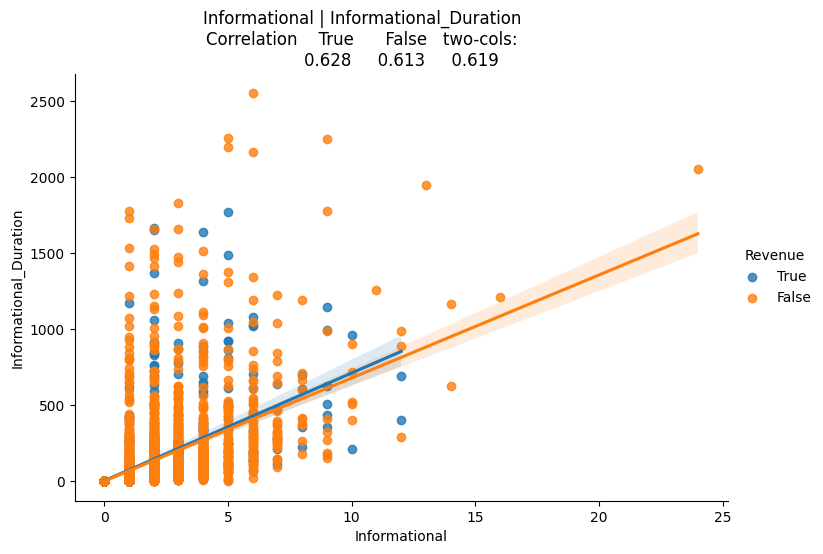

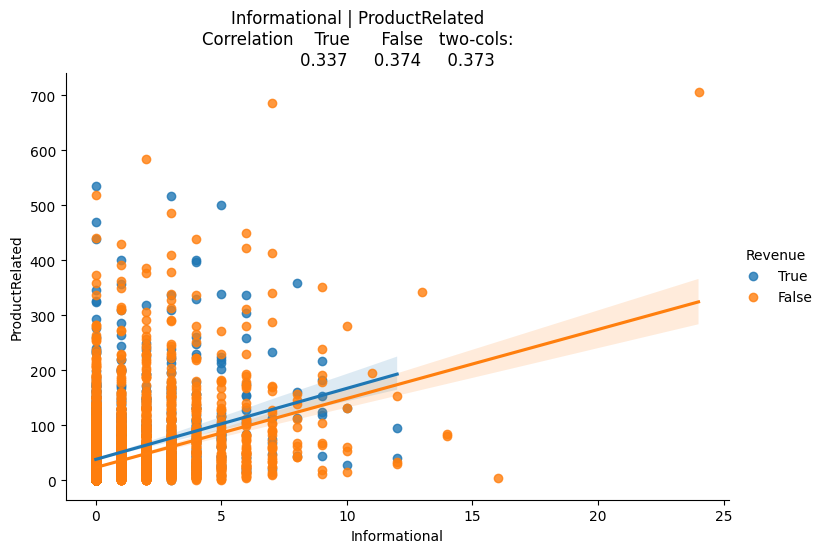

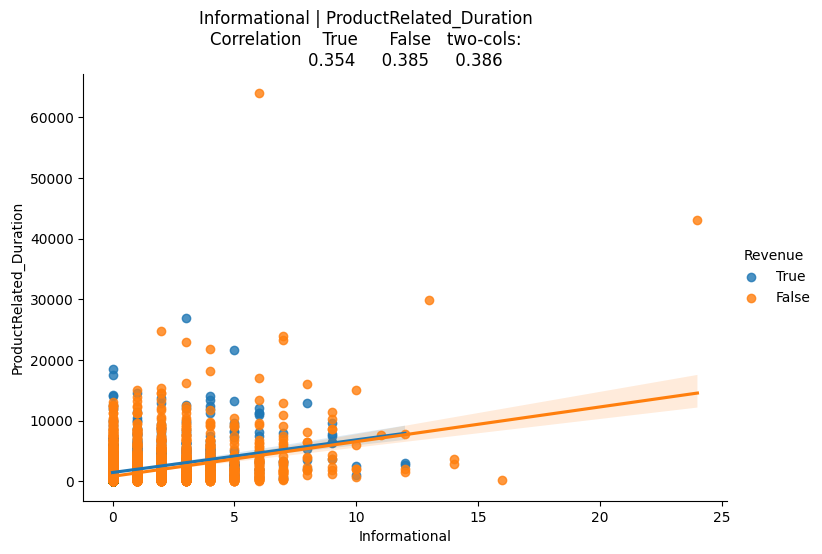

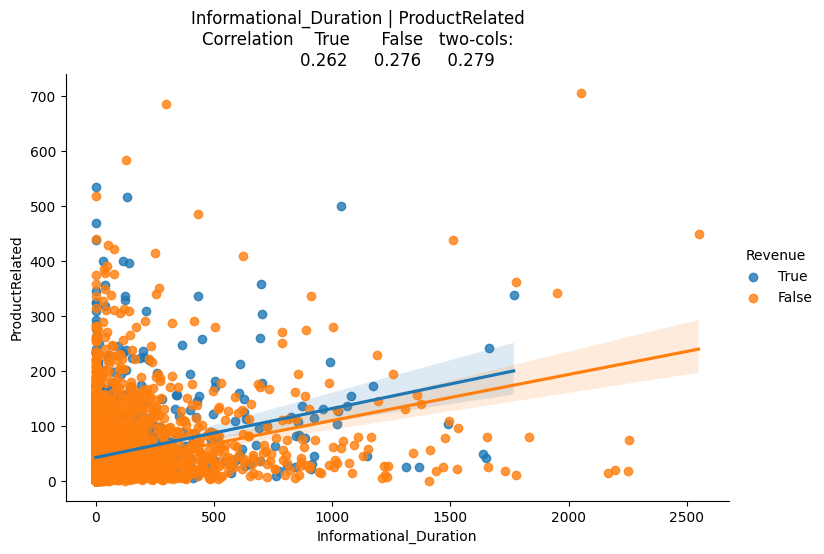

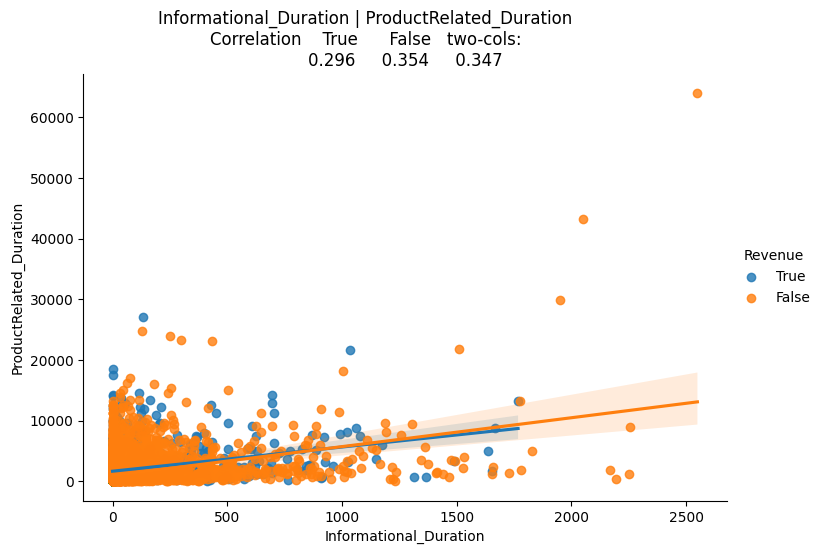

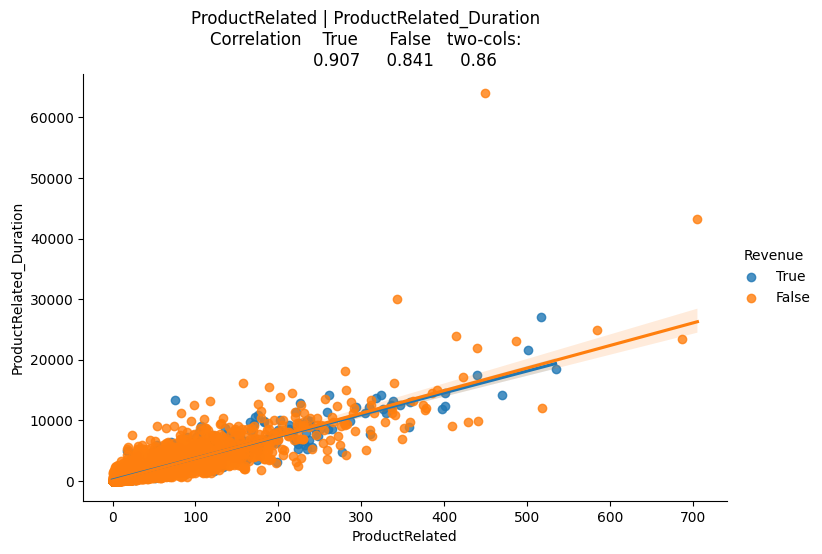

In [58]:
cols = ['BounceRates', 'PageValues', 'ExitRates',
        'Administrative', 'Administrative_Duration',
        'Informational', 'Informational_Duration',\
        'ProductRelated', 'ProductRelated_Duration']

mask = df['Revenue'] == True
rev_true = df[mask]
rev_false = df[~mask]

for i, col in enumerate(cols):
    while(i < len(cols)):
        if cols[i] == col:
                i += 1
                continue
        corr_rev_true = np.corrcoef(rev_true[col], rev_true[cols[i]])[0, 1]
        corr_rev_false = np.corrcoef(rev_false[col], rev_false[cols[i]])[0, 1]
        corr_cols = np.corrcoef(df[col], df[cols[i]])[0, 1]
        
        ax = sns.lmplot(data=df, x=col, y=cols[i], 
                hue='Revenue',
                hue_order=[True, False],
                height=5,
                aspect=1.5)
        ax.set(title= f"{col} | {cols[i]}\
               \nCorrelation    True      False   two-cols:\
               \n{np.round(corr_rev_true, 3)}     {np.round(corr_rev_false, 3)}     {np.round(corr_cols, 3)}")
        i += 1

        plt.savefig(f'figs/regression correlation {col} AND {[i]} with Revenue as hue.png', format='png')
        plt.show()